### Tasks 1/4
#### -      Load four arbitrary images and their corresponding segmentation masks and metadata

In [70]:
import os
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import json
import imageio.v3 as io

In [8]:
Data_Path = "Data/Mini_BAGLS_dataset/"

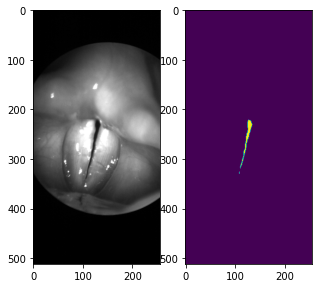

{'Video Id': 37, 'Camera': 'KayPentax HSV 9710 (Photron)', 'Sampling rate (Hz)': 4000, 'Video resolution (px, HxW)': [512, 256], 'Color': False, 'Endoscope orientation': '70°', 'Endoscope application': 'oral', 'Age range (yrs)': '20-30', 'Subject sex': 'w', 'Subject disorder status': 'healthy', 'Segmenter': 0, 'Post-processed': 1}


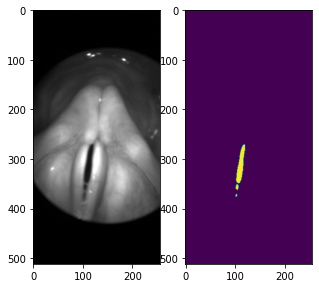

{'Video Id': 277, 'Camera': 'KayPentax HSV 9710 (Photron)', 'Sampling rate (Hz)': 4000, 'Video resolution (px, HxW)': [512, 256], 'Color': False, 'Endoscope orientation': '70°', 'Endoscope application': 'oral', 'Age range (yrs)': '', 'Subject sex': 'w', 'Subject disorder status': 'healthy', 'Segmenter': 0, 'Post-processed': 1}


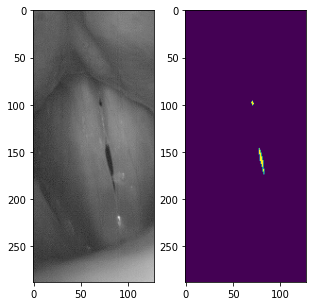

{'Video Id': 567, 'Camera': 'KayPentax HSV 9710 (Photron)', 'Sampling rate (Hz)': 6000, 'Video resolution (px, HxW)': [288, 128], 'Color': False, 'Endoscope orientation': '70°', 'Endoscope application': 'oral', 'Age range (yrs)': '40-50', 'Subject sex': 'm', 'Subject disorder status': 'healthy', 'Segmenter': 1, 'Post-processed': 2}


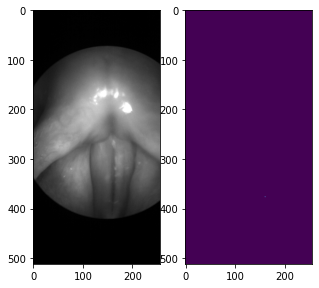

{'Video Id': 104, 'Camera': 'KayPentax HSV 9710 (Photron)', 'Sampling rate (Hz)': 4000, 'Video resolution (px, HxW)': [512, 256], 'Color': False, 'Endoscope orientation': '70°', 'Endoscope application': 'oral', 'Age range (yrs)': '50-60', 'Subject sex': 'w', 'Subject disorder status': 'healthy', 'Segmenter': 0, 'Post-processed': 2}


In [73]:
Data_Path = "Data/Mini_BAGLS_dataset/"
all_Files = os.listdir(Data_Path)
all_File_Names = [file.split(".")[0] for file in all_Files if ".meta" in file]
for i in range(4) :
    name = all_File_Names[i]

    png_path = os.path.join(Data_Path + name + ".png")
    seg_path = os.path.join(Data_Path + name + "_seg.png") 
    meta_path = os.path.join(Data_Path + name + ".meta")

    png_img = Image.open(png_path)
    seg_img = Image.open(seg_path)
    meta_file = open(meta_path)
    meta_data = json.load(meta_file)

    fig , (ax1,ax2) = plt.subplots(1, 2, figsize=(5, 5))
    ax1.imshow(png_img)
    ax2.imshow(seg_img)
    plt.show()
    print(meta_data)

#### Plot the images with the segmentation masks overlaid in a picture

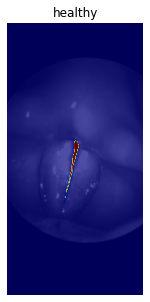

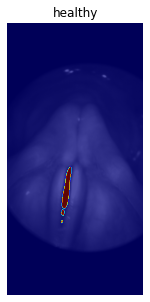

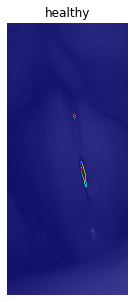

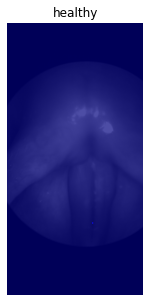

In [74]:
Data_Path = "Data/Mini_BAGLS_dataset/"
all_Files = os.listdir(Data_Path)
all_File_Names = [file.split(".")[0] for file in all_Files if ".meta" in file]
for i in range(4) :
    name = all_File_Names[i]
    
    png_path = os.path.join(Data_Path + name + ".png")
    seg_path = os.path.join(Data_Path + name + "_seg.png")
    meta_path = os.path.join(Data_Path + name + ".meta")

    png_img = io.imread(png_path)
    img_seg = io.imread(seg_path)
    meta_file = open(meta_path)
    meta_data = json.load(meta_file)

    fig , ax1 = plt.subplots(1, 1, figsize=(5, 5))
    ax1.axis("off")
    ax1.set_title(meta_data["Subject disorder status"])
    plt.imshow(png_img, cmap='gray')
    plt.imshow(img_seg, cmap='jet', alpha=0.7)
plt.show()

#### convert an image from RGB to Grayscale

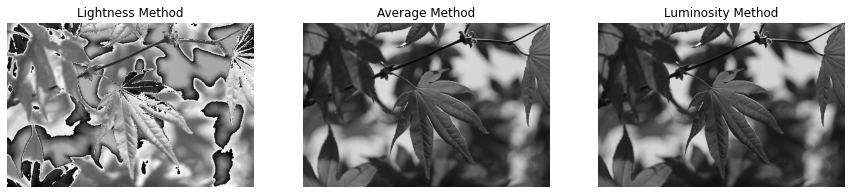

In [82]:
leaves_image_path = os.path.join("Data/leaves.jpg")
leaves_img = io.imread(leaves_image_path)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
# Lightness Method
gray_image = (numpy.amin(leaves_img,axis=2) + numpy.amax(leaves_img,axis=2) ) / 2
ax1.imshow(gray_image,cmap="gray")
ax1.axis("off")
ax1.set_title("Lightness Method")
# Average Method
gray_image = numpy.sum(leaves_img,axis=2) / 3
ax2.imshow(gray_image,cmap="gray")
ax2.axis("off")
ax2.set_title("Average Method")
# Luminosity Method
gray_image = numpy.multiply(numpy.array([0.2989 , 0.5870 , 0.1140]) , leaves_img)
gray_image = gray_image.sum(axis=2)
ax3.imshow(gray_image,cmap="gray")
ax3.axis("off")
ax3.set_title("Luminosity Method")

plt.show()

which method for RGB to grayscale conversion is the preferred one? State in 1-2 sentences why you think this 
- I think the Luminosity method is the prefered one. in the Lightness method we taking the maximum and the minimum so it may be affected by noise. So , averging is more robust to the noise. but , the Luminosity is a weighted average to account for human perception. consequently , I think the Luminosity method is the best one.